# Import Python Libraries

In [221]:
# Libraries for EDA and Data Cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Libraries for Data Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Libraries for Model Training and Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# Import Data from CSV File

In [222]:
df = pd.read_csv('data/customerChurnModelling.csv')

# Data Cleaning

In [223]:
# Drop non-predictable columns - RowNumber, CustomerId, Surname
columnsToDrop = ['RowNumber','CustomerId','Surname']
df.drop(columnsToDrop, axis=1, inplace=True)

In [224]:
df.rename(columns={"Satisfaction Score" : "SatisfactionScore","Point Earned" : "PointEarned","Card Type":"CardType"}, inplace=True)

# Exploratory Data Analysis

In [225]:
# Inspect Head
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [226]:
# Inspect Tail
df.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,CardType,PointEarned
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


# Observation

- All the column names are already standardized
- Columns RowNumber, CustomerId, Surname can be dropped
- We can perform both Classification and Regression problems
    - Binary Classification - Exited
    - Multi-class Classification - Satisfaction Score
    - Regression Problem - Points Earned, CreditScore

In [227]:
# Inspect Structure
df.shape

(10000, 15)

# Observation

- Dataset has 10k rows and 18 columns

In [228]:
# Inspect Variablesname
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'SatisfactionScore', 'CardType', 'PointEarned'],
      dtype='object')

In [229]:
# Inspect Variablename and their datatype
df.dtypes

CreditScore            int64
Geography             object
Gender                object
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Complain               int64
SatisfactionScore      int64
CardType              object
PointEarned            int64
dtype: object

In [230]:
# Inspect Non-Missing Values
df.count()

CreditScore          10000
Geography            10000
Gender               10000
Age                  10000
Tenure               10000
Balance              10000
NumOfProducts        10000
HasCrCard            10000
IsActiveMember       10000
EstimatedSalary      10000
Exited               10000
Complain             10000
SatisfactionScore    10000
CardType             10000
PointEarned          10000
dtype: int64

In [231]:
# Inspect Unique Values
df.nunique()

CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
NumOfProducts           4
HasCrCard               2
IsActiveMember          2
EstimatedSalary      9999
Exited                  2
Complain                2
SatisfactionScore       5
CardType                4
PointEarned           785
dtype: int64

In [232]:
# Inspect Meta-Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Geography          10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Complain           10000 non-null  int64  
 12  SatisfactionScore  10000 non-null  int64  
 13  CardType           10000 non-null  object 
 14  PointEarned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


# Descriptive Statistics Summary

In [233]:
# Numeric Variables
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,SatisfactionScore,PointEarned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [234]:
# Categorical Variables
df.describe(include='object')

,Geography,Gender,CardType
count,10000,10000,10000
unique,3,2,4
top,France,Male,DIAMOND
freq,5014,5457,2507


# Handling Duplicates

In [235]:
df.duplicated().sum()

0

# Handling Missing Values

In [236]:
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Complain             0
SatisfactionScore    0
CardType             0
PointEarned          0
dtype: int64

# Separate Numeric and Categorical Columns

In [237]:
# Separate int64, float64, and categorical columns
int_columns = df.select_dtypes(include='int64').columns
float_columns = df.select_dtypes(include='float64').columns
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

print("\nInteger Columns:", int_columns)
#print(df[int_columns])

print("\nFloat Columns:", float_columns)
#print(df[float_columns])

print("\nCategorical Columns:", categorical_columns)
#print(df[categorical_columns])


Integer Columns: Index(['CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Complain', 'SatisfactionScore',
       'PointEarned'],
      dtype='object')

Float Columns: Index(['Balance', 'EstimatedSalary'], dtype='object')

Categorical Columns: Index(['Geography', 'Gender', 'CardType'], dtype='object')


# Univariate Analysis

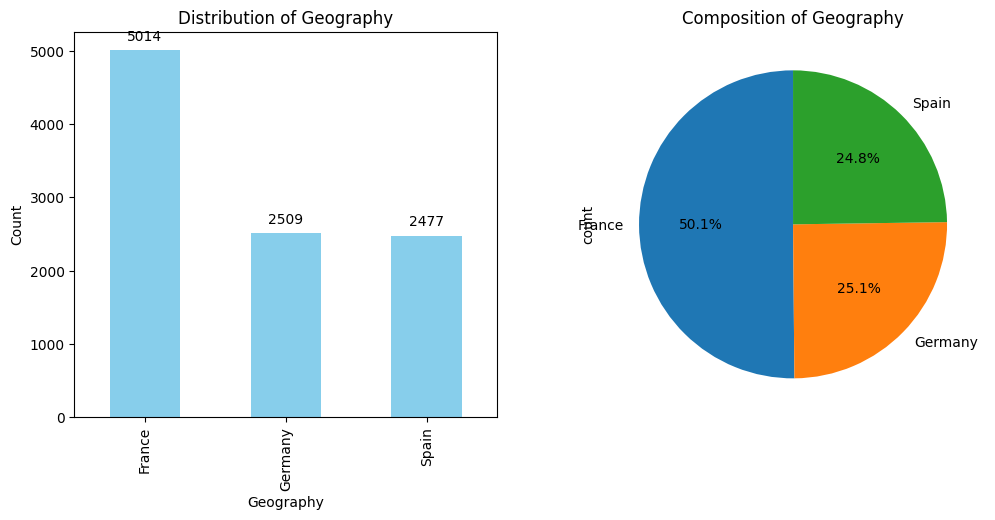

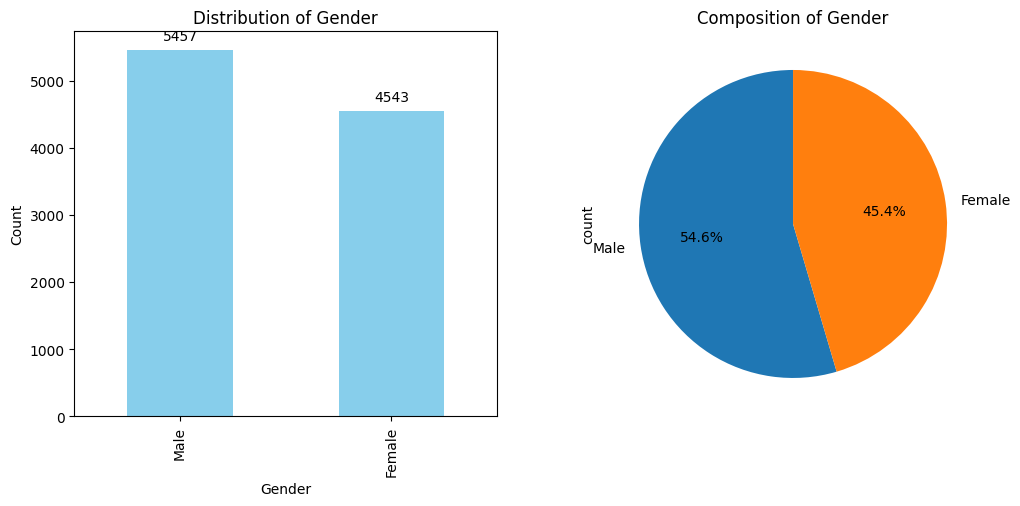

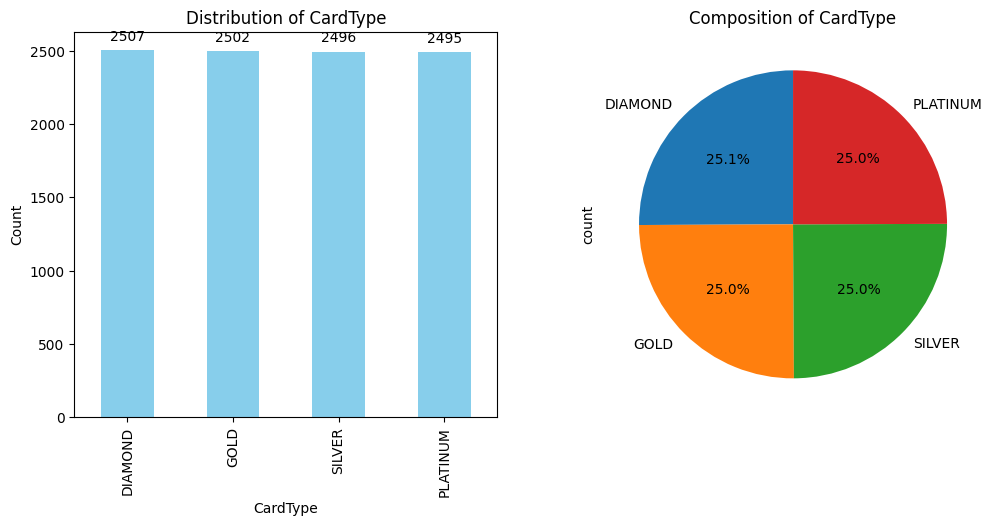

In [238]:
for column in categorical_columns:
    # Create subplots with 1 row and 2 columns
    fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=(12, 5))

    # Bar plot
    df[column].value_counts().plot(kind='bar', color='skyblue', ax=ax_bar)
    ax_bar.set_title("Distribution of {}".format(column))
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel("Count")

    # Add data labels to the bar plot
    for p in ax_bar.patches:
        ax_bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Pie chart
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax_pie)
    ax_pie.set_title("Composition of {}".format(column))

    plt.show()
    plt.close()  # Optional: Clear output between plots

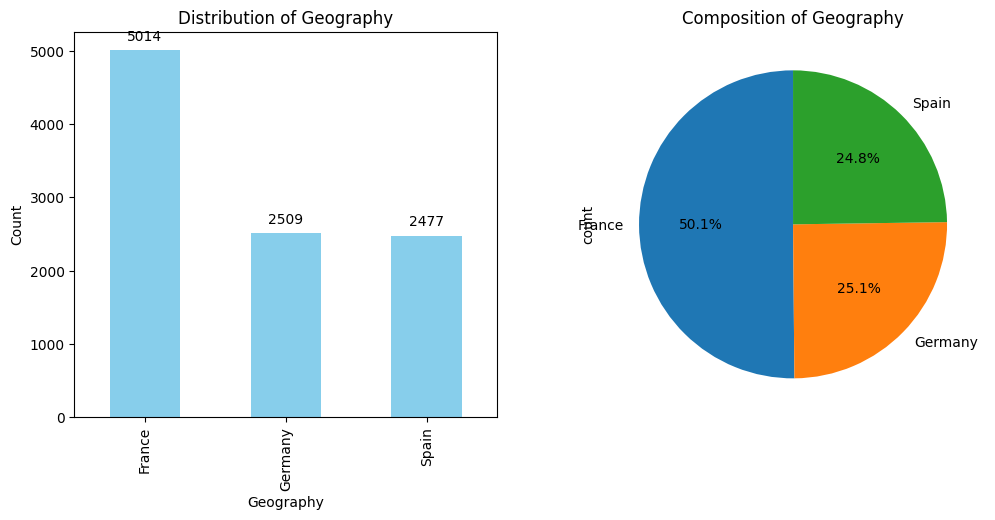

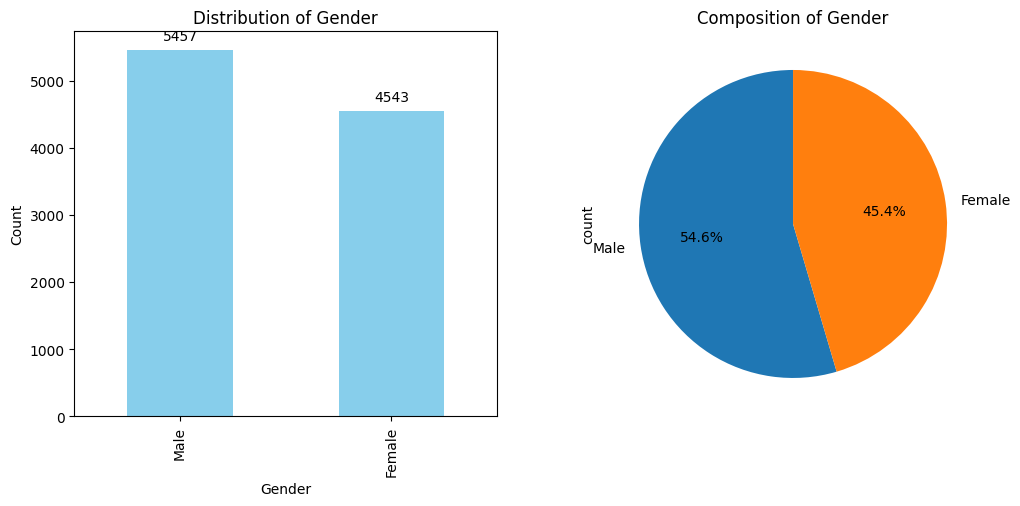

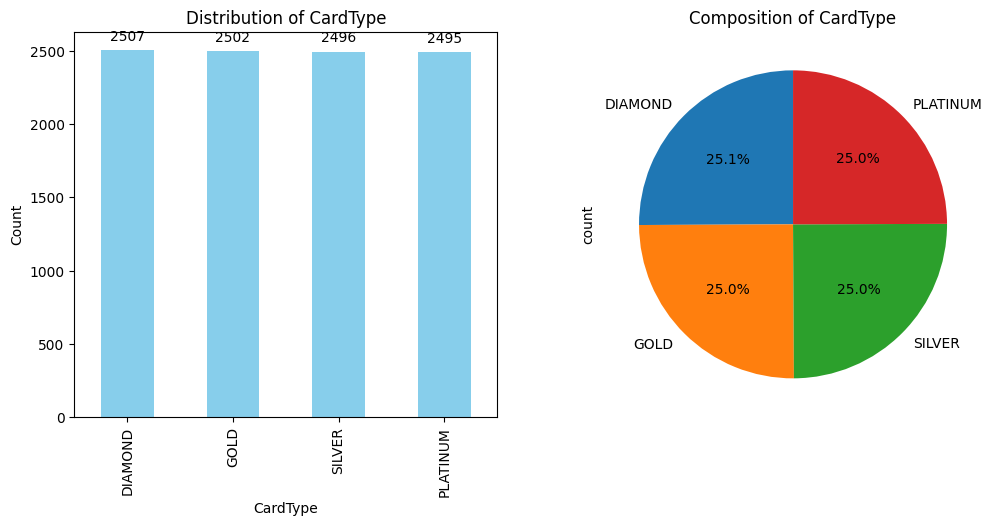

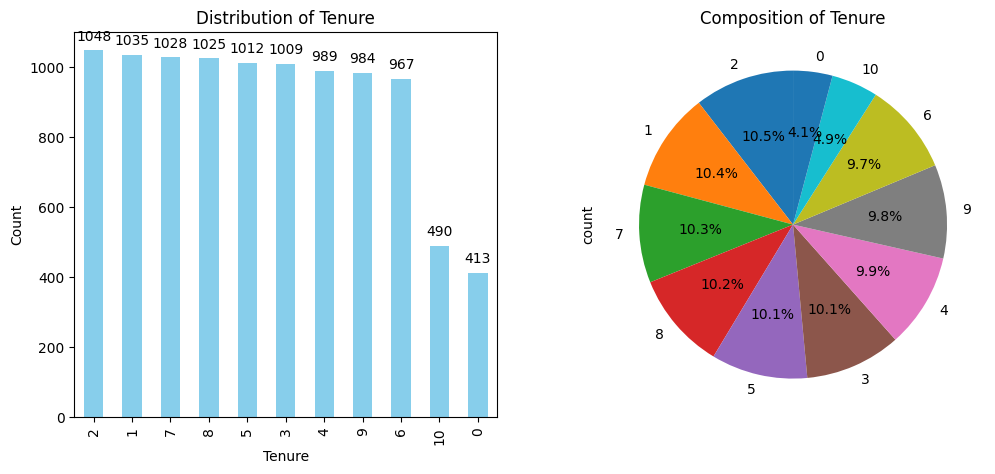

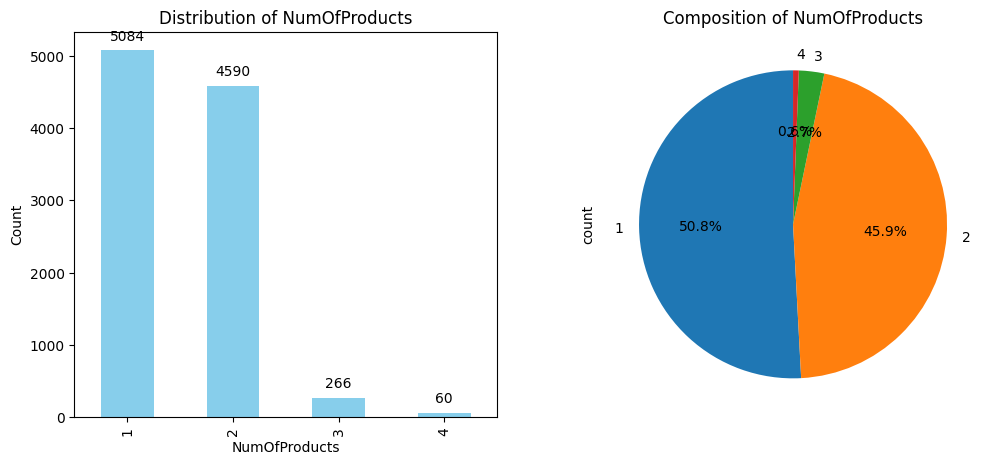

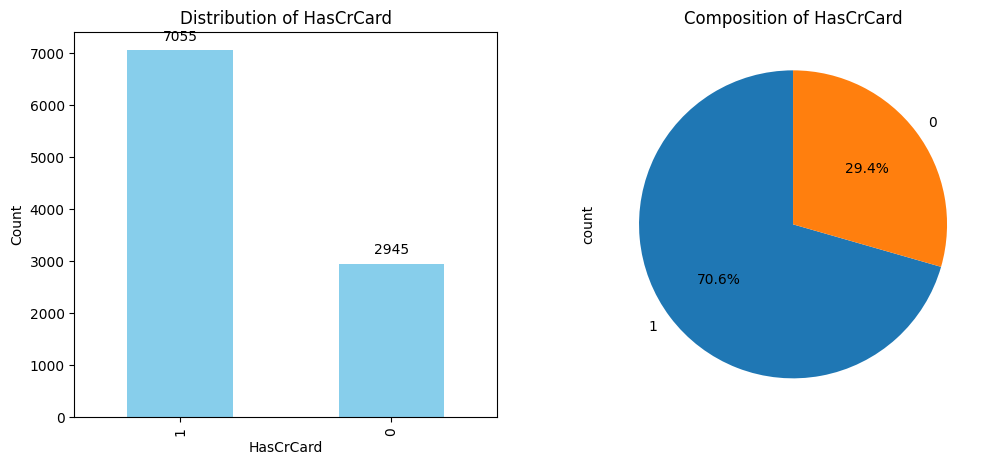

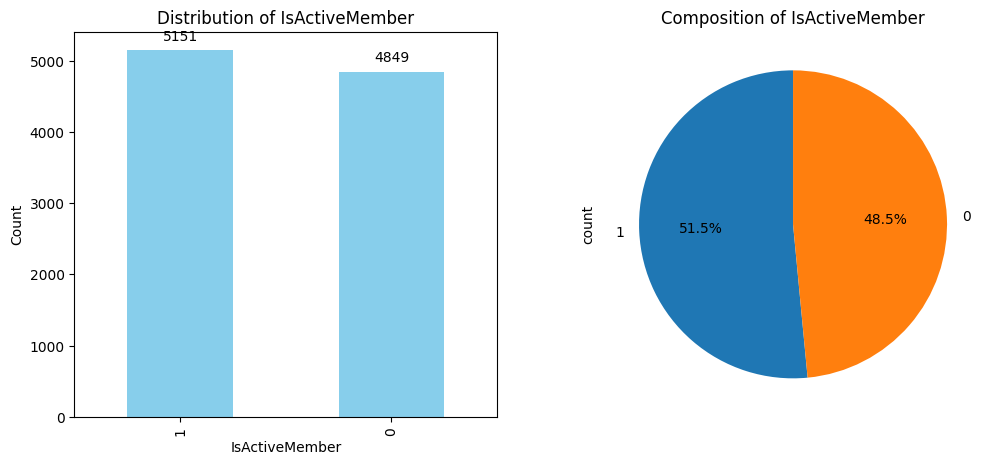

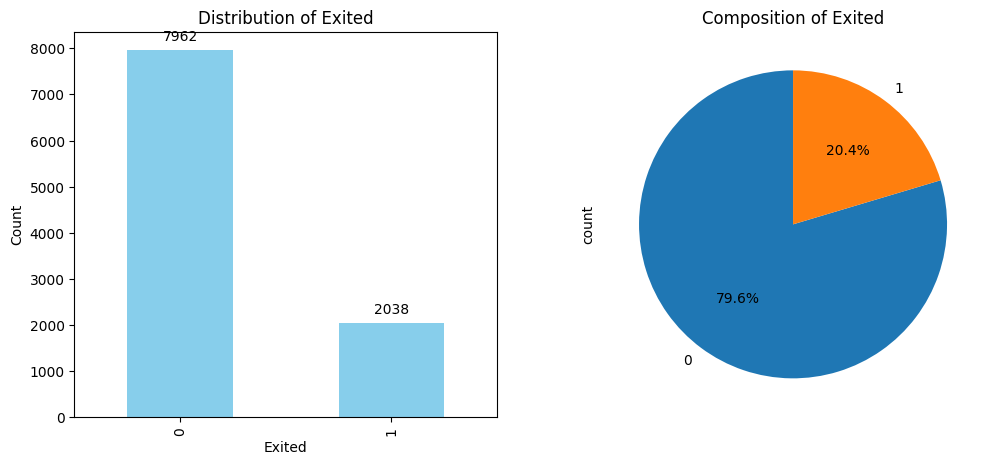

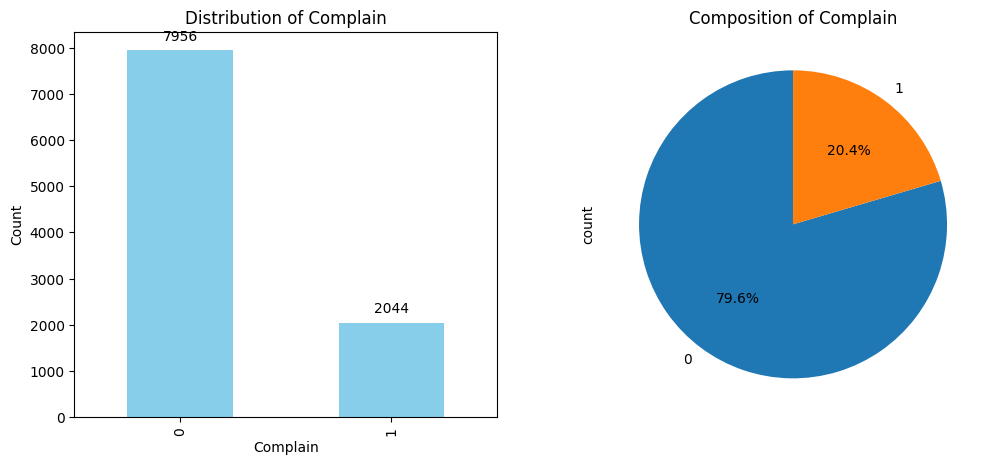

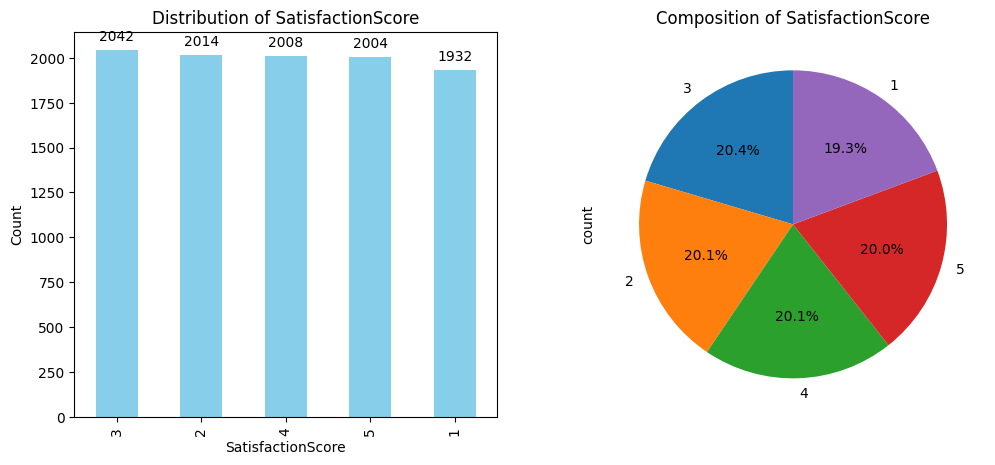

In [239]:
# Assuming df is your DataFrame
columns = ["Geography","Gender","CardType","Tenure", "NumOfProducts", "HasCrCard","IsActiveMember","Exited","Complain","SatisfactionScore"]

for column in columns:
    # Create subplots with 1 row and 2 columns
    fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=(12, 5))

    # Bar plot
    df[column].value_counts().plot(kind='bar', color='skyblue', ax=ax_bar)
    ax_bar.set_title("Distribution of {}".format(column))
    ax_bar.set_xlabel(column)
    ax_bar.set_ylabel("Count")

    # Add data labels to the bar plot
    for p in ax_bar.patches:
        ax_bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    # Pie chart
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax_pie)
    ax_pie.set_title("Composition of {}".format(column))

    plt.show()
    plt.close()  # Optional: Clear output between plots

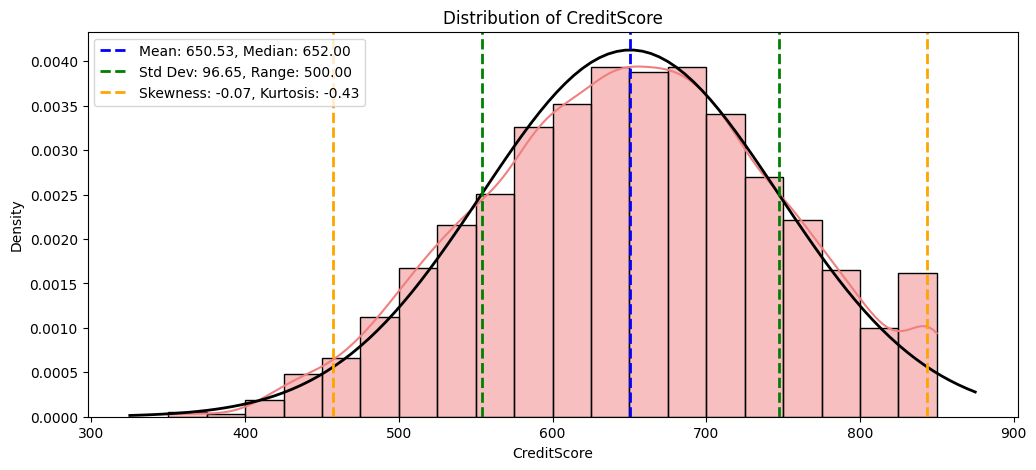

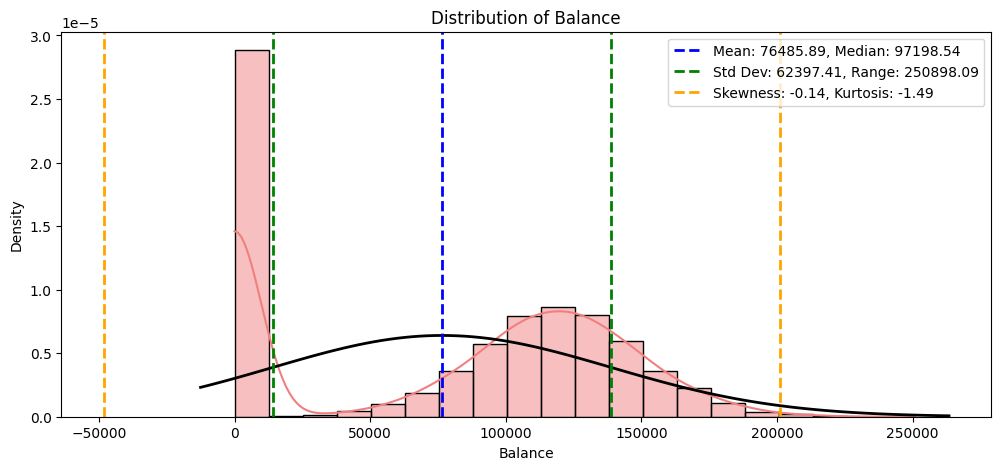

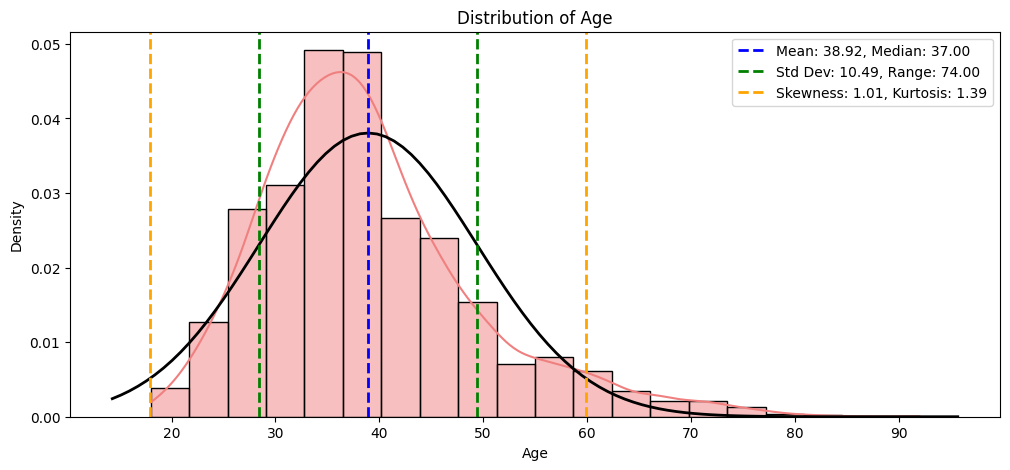

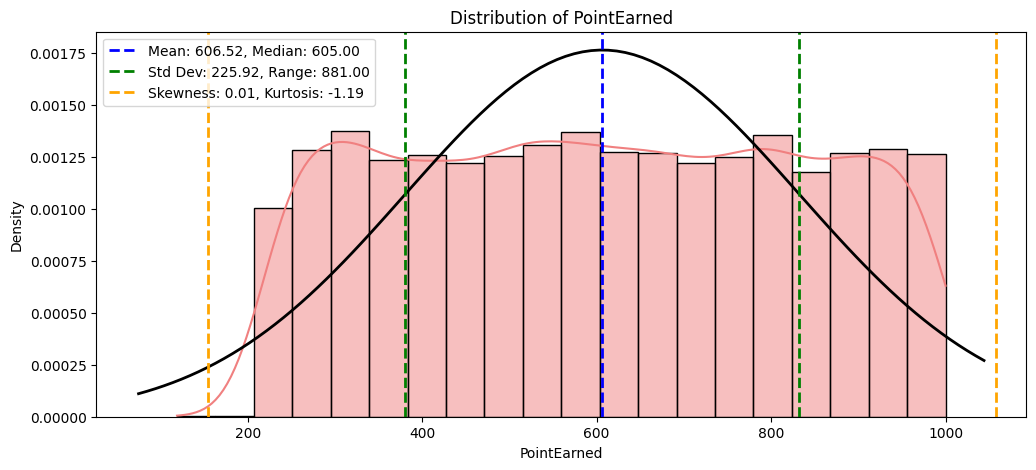

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

# Assuming df is your DataFrame
columns = ["CreditScore", "Balance", "Age", "PointEarned"]

# Plot distribution charts with normality line, mean, median, std dev, range, skewness, and kurtosis
for column in columns:
    plt.figure(figsize=(12, 5))

    # Plot distribution
    sns.histplot(df[column], kde=True, color='lightcoral', bins=20, edgecolor='black', stat='density')

    # Plot normality line
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, df[column].mean(), df[column].std())
    plt.plot(x, p, 'k', linewidth=2)

    # Display mean, median, std dev, range, skewness, and kurtosis
    mean_value = df[column].mean()
    median_value = df[column].median()
    std_dev_value = df[column].std()
    range_value = df[column].max() - df[column].min()
    skewness_value = skew(df[column])
    kurtosis_value = kurtosis(df[column])

    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}, Median: {median_value:.2f}')
    plt.axvline(mean_value - std_dev_value, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_value:.2f}, Range: {range_value:.2f}')
    plt.axvline(mean_value + std_dev_value, color='green', linestyle='dashed', linewidth=2)
    
    # Display Skewness and Kurtosis in the legend
    plt.axvline(mean_value - 2 * std_dev_value, color='orange', linestyle='dashed', linewidth=2,
                label=f'Skewness: {skewness_value:.2f}, Kurtosis: {kurtosis_value:.2f}')
    plt.axvline(mean_value + 2 * std_dev_value, color='orange', linestyle='dashed', linewidth=2)

    # Set titles and labels
    plt.title("Distribution of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Density")

    # Add legend
    plt.legend()

    plt.show()

# Bi-Variate Analysis

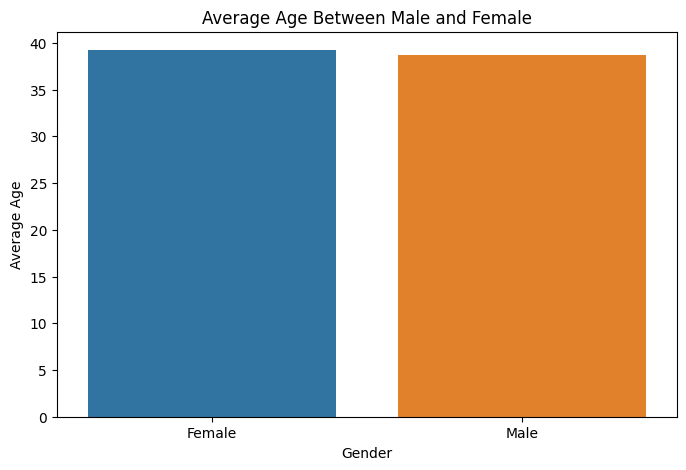

In [241]:
# Plot average age between male and female
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Age', data=df, ci=None)  # ci=None removes confidence intervals
plt.title('Average Age Between Male and Female')
plt.xlabel('Gender')
plt.ylabel('Average Age')

plt.show()

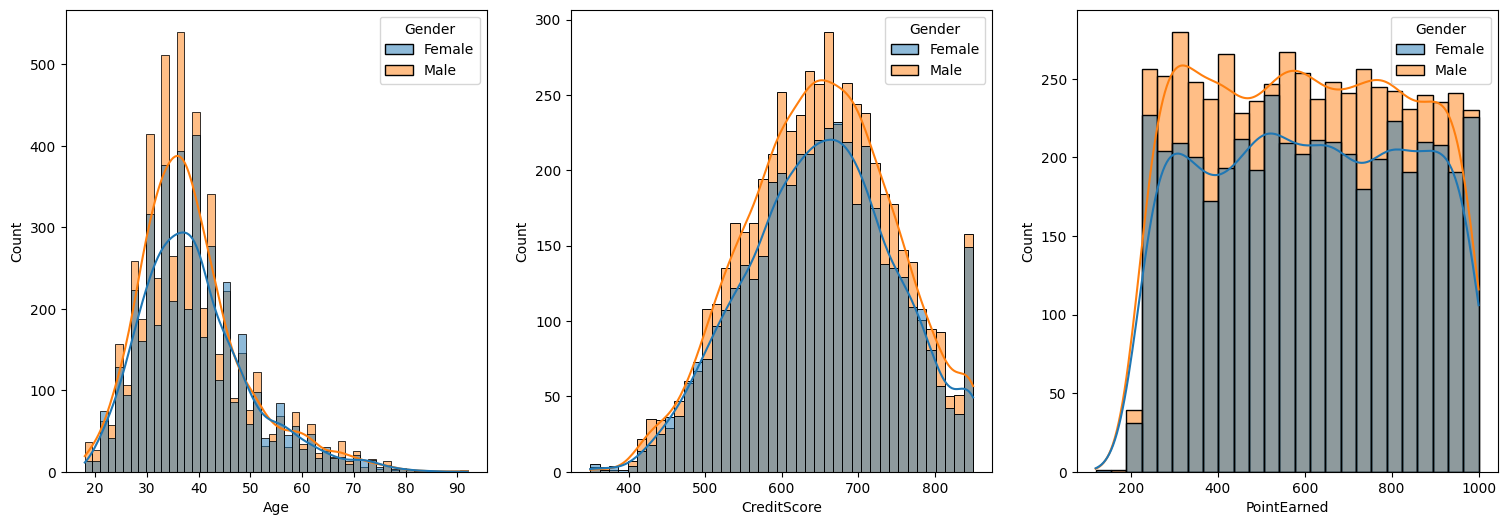

In [242]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Age',bins=50,kde=True,hue='Gender')
plt.subplot(142)
ax =sns.histplot(data=df,x='CreditScore',kde = True,hue='Gender')
plt.subplot(143)
ax =sns.histplot(data=df,x='PointEarned',kde = True, hue='Gender')
plt.show()

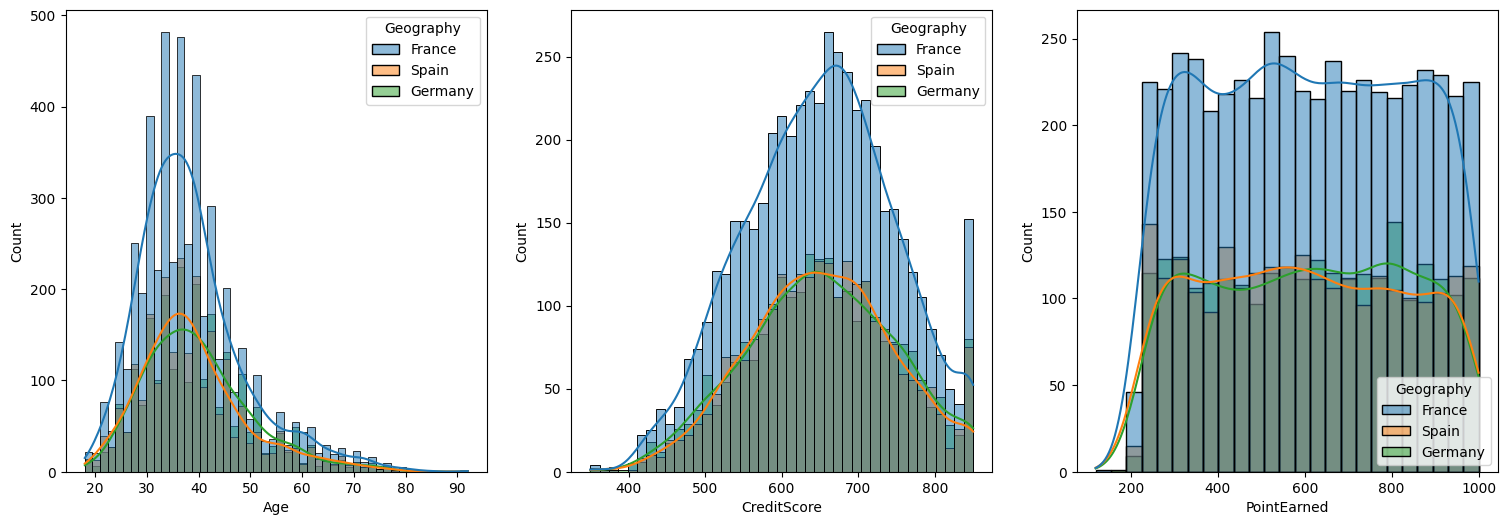

In [243]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Age',bins=50,kde=True,hue='Geography')
plt.subplot(142)
ax =sns.histplot(data=df,x='CreditScore',kde = True,hue='Geography')
plt.subplot(143)
ax =sns.histplot(data=df,x='PointEarned',kde = True, hue='Geography')
plt.show()

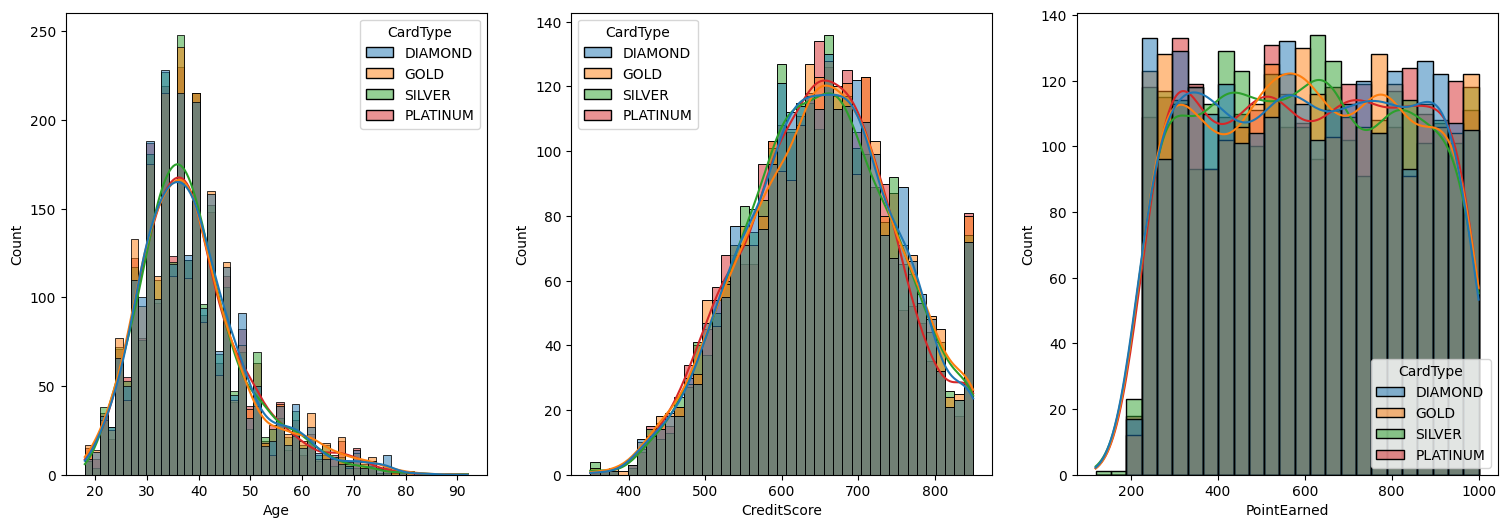

In [244]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Age',bins=50,kde=True,hue='CardType')
plt.subplot(142)
ax =sns.histplot(data=df,x='CreditScore',kde = True,hue='CardType')
plt.subplot(143)
ax =sns.histplot(data=df,x='PointEarned',kde = True, hue='CardType')
plt.show()

In [245]:
# sns.pairplot(df,hue = 'Gender')
# plt.show()

# Train-Test Split

In [246]:
X = df.drop(columns="EstimatedSalary", axis=1)
y = df["EstimatedSalary"]

# Data Preprocessing

In [247]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Columns to be one-hot encoded
oh_encoding_features = ["Geography", "Gender"]

# Columns to be ordinal encoded
ordinal_encoding_features = ["CardType"]

# Numeric features for StandardScaler
num_features = X.select_dtypes(exclude="object").columns

oh_transformer = OneHotEncoder()
ordinal_transformer = OrdinalEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_encoding_features),
        ("OrdinalEncoder", ordinal_transformer, ordinal_encoding_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [248]:
X = preprocessor.fit_transform(X)
X.shape

(10000, 17)

In [249]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 17), (2000, 17))

In [250]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((8000, 17), (2000, 17))

# Model Evaluation Fucntion

In [251]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [252]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 57464.5287
- Mean Absolute Error: 49571.2973
- R2 Score: 0.0018
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 57545.1849
- Mean Absolute Error: 49815.8937
- R2 Score: -0.0031


Lasso
Model performance for Training set
- Root Mean Squared Error: 57457.8135
- Mean Absolute Error: 49561.3350
- R2 Score: 0.0020
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 57557.2244
- Mean Absolute Error: 49834.0745
- R2 Score: -0.0035


Ridge
Model performance for Training set
- Root Mean Squared Error: 57457.8101
- Mean Absolute Error: 49561.0782
- R2 Score: 0.0020
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 57557.6927
- Mean Absolute Error: 49834.4847
- R2 Score: -0.0035


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 51636.2416
- Mean Absolute E

In [253]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,-0.003088
1,Lasso,-0.003508
2,Ridge,-0.003524
8,AdaBoost Regressor,-0.003758
5,Random Forest Regressor,-0.058982
7,CatBoosting Regressor,-0.069147
6,XGBRegressor,-0.155499
3,K-Neighbors Regressor,-0.222013
4,Decision Tree,-1.077344
